In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'"C:\Drive (D)\College\SEM. - 6\ADML\Dataset\Player.csv"')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [141]:
df.sample(5)

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
267,-Roy Smalley,459,113,20,59,57,68,12,5348,1369,...,713,660,735,A,W,0,0,0,740.0,A
275,-Steve Buechele,461,112,18,54,54,35,2,680,160,...,76,75,49,A,W,111,226,11,135.0,A
107,-Frank White,566,154,22,76,84,43,14,6100,1583,...,743,693,300,A,W,316,439,10,750.0,A
87,-Dan Pasqua,280,82,16,44,45,47,2,428,113,...,61,70,63,A,E,148,4,2,110.0,A
272,-Steve Balboni,512,117,29,54,88,43,6,1750,412,...,204,276,155,A,W,1236,98,18,100.0,A


In [142]:
df.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [143]:
df = df.dropna()

In [144]:
df.duplicated().sum()

np.int64(0)

In [145]:
df = df.drop('Unnamed: 0', axis=1)

In [146]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


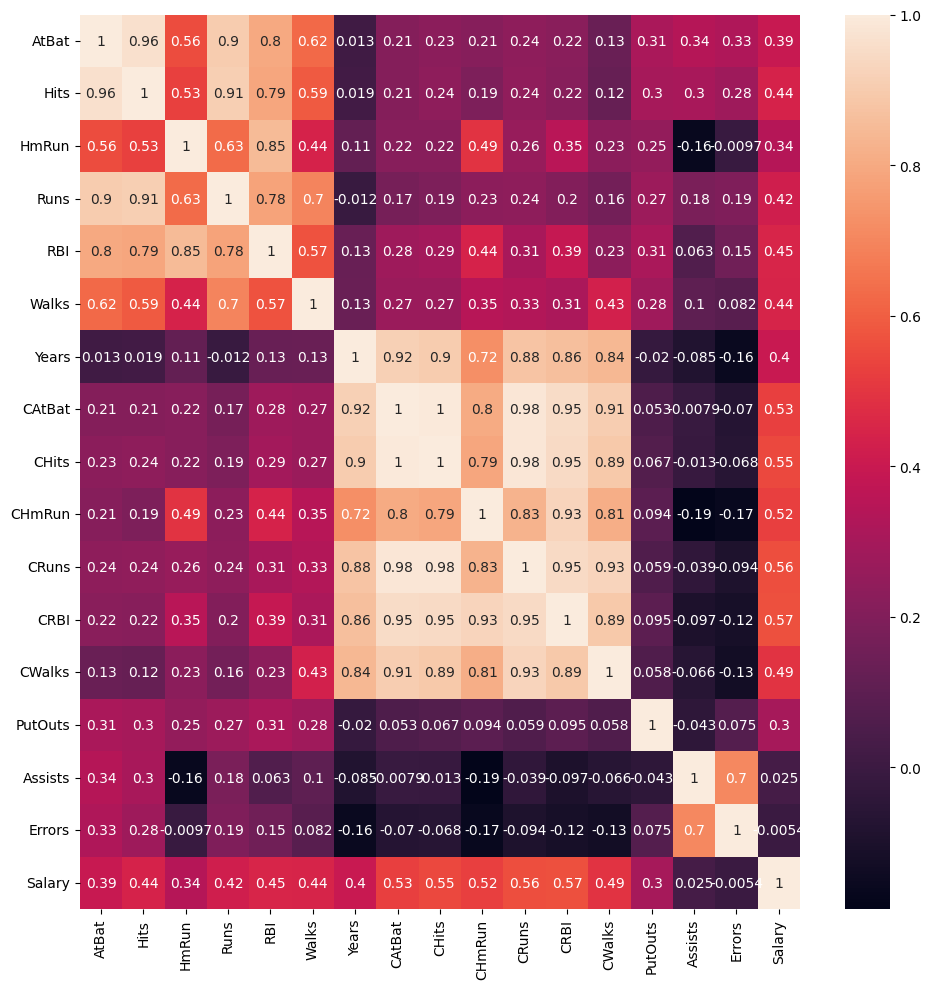

In [276]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.tight_layout()

In [210]:
X = df.drop(['Salary', 'League', 'NewLeague', 'Division'], axis=1)
y = df['Salary']

cat_cols = pd.get_dummies(df[['League', 'NewLeague', 'Division']])
X = pd.concat([X, cat_cols], axis=1)

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((184, 22), (79, 22), (184,), (79,))

In [213]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

y_train = sc.fit_transform(y_train.to_numpy().reshape(-1,1))
y_test = sc.transform(y_test.to_numpy().reshape(-1,1))

## Ridge Regressor

In [230]:
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [231]:
y_pred = rr.predict(X_test)
print('mse', mean_squared_error(y_pred, y_test))
print('r2', r2_score(y_test, y_pred))

mse 0.4757162906651405
r2 0.5728950646681105


In [232]:
alpha = 10**np.linspace(10,-2,100)*0.00001

In [233]:
coef = []
for a in alpha:
    rr.set_params(alpha=a)
    rr.fit(X_train, y_train)
    coef.append(rr.coef_)
coef = np.array(coef)
coef.shape

(100, 22)

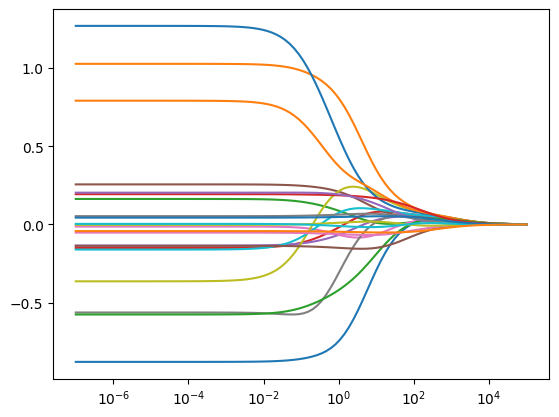

In [234]:
ax = plt.gca()
ax.plot(alpha, coef)
ax.set_xscale('log')

In [235]:
ridgecv = RidgeCV(alphas=alpha, cv=5)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

np.float64(0.15199110829529333)

## Linear Regreesor

In [220]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [250]:
y_pred = lr.predict(X_test)
print('mse', mean_squared_error(y_test, y_pred))
print('r2', r2_score(y_test, y_pred))

mse 0.4778236841458523
r2 0.5710030164579476


## Lasso Regressor

In [260]:
lasso = Lasso(alpha=123)
lasso.fit(X_train, y_train)

,alpha,123
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [261]:
y_pred = lasso.predict(X_test)
print('mse', mean_squared_error(y_test, y_pred))
print('r2', r2_score(y_test, y_pred))

mse 1.1664452814853954
r2 -0.04725136871061997


In [262]:
reg = LassoCV(alphas=alpha, cv=5, max_iter=100000).fit(X, y)
reg.alpha_

np.float64(123.2846739442066)